In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

google= (r'C:\Users\wharr\Desktop\googleplaystore.csv')
Google= pd.read_csv(google)
Google.head()

apple= (r'C:\Users\wharr\Desktop\AppleStore.csv')
Apple= pd.read_csv(apple)
Apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [2]:
Google= Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [3]:
Apple= Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


In [4]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [5]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [6]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
Google[Google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [8]:
Google = Google[Google['Price'] != 'Everyone']
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [9]:
nosymb = Google['Price'].str.replace('$',' ')

C:\Users\wharr\AppData\Local\Temp\ipykernel_4196\2246591293.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google['Price'].str.replace('$',' ')


In [10]:
Google['Price'] = pd.to_numeric(nosymb)

In [11]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [12]:
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [13]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [14]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

In [15]:
old_names = Apple.columns
new_names= Google.columns
Apple = Apple.rename(columns = dict(zip(old_names,new_names)))

In [16]:
df = Apple.append(Google,ignore_index= True)

C:\Users\wharr\AppData\Local\Temp\ipykernel_4196\1413394841.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = Apple.append(Google,ignore_index= True)


In [17]:
df.sample(12)

,Category,Rating,Reviews,Price,platform
3615,Games,4.5,6841,0.00,apple
2863,Productivity,4.5,21561,0.00,apple
8655,HOUSE_AND_HOME,3.7,1437,0.00,google
5484,Games,5.0,876,1.99,apple
4327,Games,4.0,2853,0.00,apple
13888,SOCIAL,4.8,1902,0.00,google
8862,GAME,4.4,2610526,0.00,google
14303,SPORTS,4.5,838738,0.00,google
17985,GAME,4.0,368,0.00,google
12564,GAME,4.0,630,4.99,google


In [18]:
print(df.shape)
df =  df.dropna()
print(df.shape)

(18037, 5)
(16563, 5)


In [19]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [20]:
df = df[df['Reviews'] != 0]

In [21]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


<AxesSubplot:title={'center':'Rating'}, xlabel='platform'>

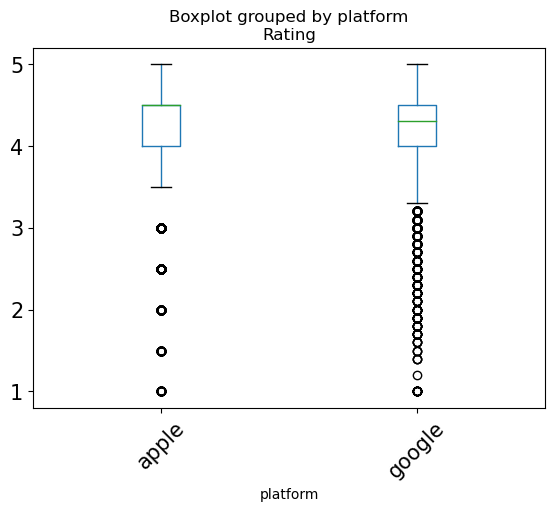

In [22]:
df.boxplot(by='platform', column =['Rating'], grid=False, rot=45, fontsize=15)

In [23]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

In [24]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [25]:
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


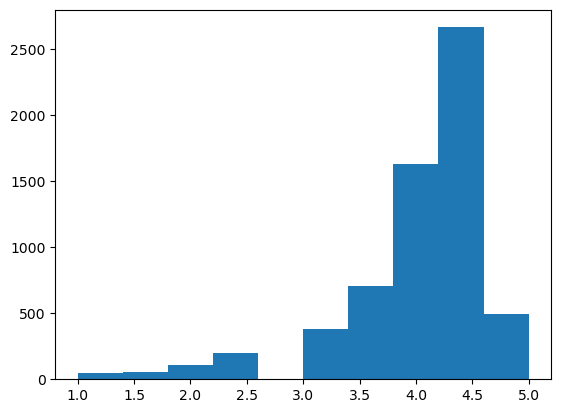

In [26]:
histoApple = plt.hist(apple)

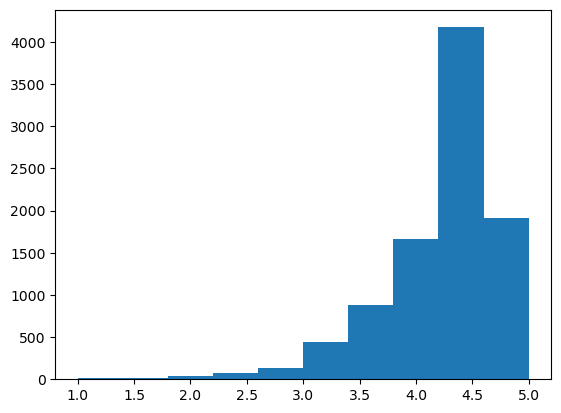

In [27]:
histoGoogle = plt.hist(google)

In [28]:
df['Permutation1'] = np.random.permutation(df['Rating'])

In [29]:
df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.145070,0.609943,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.127931,0.614895,1.0,4.0,4.3,4.5,5.0


In [30]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [31]:
difference = list()
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

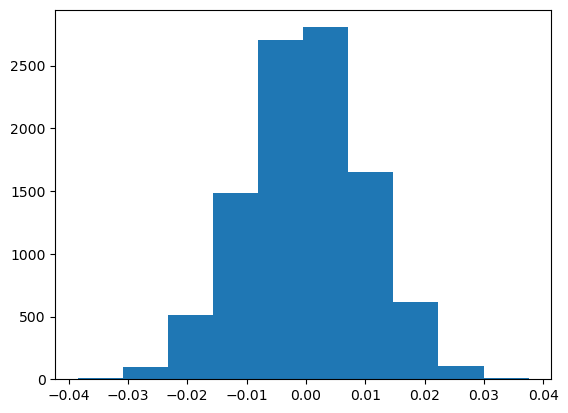

In [32]:
histo = plt.hist(difference)

In [33]:
obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)


In [34]:
print(obs_difference)

0.14206054745123442
